# Option Pricing with Black and Scholes formula

**Description** : An **Option** is a financial contract between two parties, which gives to the buyer the right, and not the obligation, to buy or sell an **underlying asset** at a **predetermined price** (also known as a **Strike**) and within a specific **time frame**. 

The **Black-Scholes formula** is a famous mathematical formula which is used to estimate the price of an European Option, which is a type of Option which could be only exercised at the maturity. It was developped by **Fischer Black** and **Myron Scholes** in 1973.

**Parameters** : To apply the formula, we need the following parameters : 
- The **Underlying** spot price $S$ at valuation date,
- The Exercised Price, known as **Strike** $K$,
- The **Implied Volatility** which is the expercted volatility, $\sigma$,
- The **Interest Rate** $r$ and the **Dividende Yield** $q$ (renforced by **Merton**),
- The **Time to maturity** $T$, the moment which gives the buyer the right to exercised his option

**Pricing a European Option** :  

According to Black-Scholes, the formulas for a **European Call and Put Option** are given by :

$$
\begin{matrix}
C & = & S_0 e^{-qT} \mathcal{N}(d_1) - K e^{-rT} \mathcal{N}(d_2) \\
P & = & S_0 e^{-qT} [\mathcal{N}(d_1) - 1 ] - K e^{-rT} [\mathcal{N}(d_2) - 1] \\
d_1 & = & \frac{ln \left(\frac{S}{K} \right) + \left(r-q+\frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}} \\
d_2 & = & d_1 - \sigma \sqrt{T}
\end{matrix} 
$$

With :
$$ \mathcal{N}(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^x e^{-\frac{u²}{2}} du $$


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [98]:
class BlackScholes:
    def __init__(self, S : np.ndarray, K =100.0, sigma : float = 0.1, r : float = 0.05, q : float = 0.05, T : int = 1):
        self.S = S # Could be a float, or an array/list
        self.K = K
        self.sigma = sigma
        self.r = r
        self.q = q
        self.T = T
    
    def normparam(self):
        d1 = (np.log(self.S/self.K)+(self.r -self.q + self.sigma**(2) /2)*self.T)/(self.sigma * np.sqrt(self.T))
        d2 = d1 - self.sigma * np.sqrt(self.T)
        return d1,d2
    
    def call(self):
        d1 = self.normparam()[0]
        d2 = self.normparam()[1]
        call_price = self.S*np.exp(-self.q* self.T) * norm.cdf(d1) - self.K*np.exp(-self.r * self.T) * norm.cdf(d2)
        return call_price
    
    def plotcall(self):
        the_payoff = []
        for element in self.S:
            a = max(float(element) - self.K,0)
            the_payoff.append(a)
        
        call_payoff = np.array(the_payoff)
        call_payoff = call_payoff.reshape(-1,1)
        
        call_price = self.call()
        
        # Plot 
        plt.figure(figsize = (12,4))
        plt.plot(self.S, call_price, label = "Call Price")
        plt.plot(self.S, call_payoff, linestyle = "--", color = "red",label = "Call Payoff")
        plt.legend()
        plt.show()
        
    def put(self):
        d1 = self.normparam()[0]
        d2 = self.normparam()[1]
        put_price = self.S*np.exp(-self.q* self.T) * (norm.cdf(d1)-1) - self.K*np.exp(-self.r * self.T) * (norm.cdf(d2)-1)
        return put_price
    
    def plotput(self):
        the_payoff = []
        for element in self.S:
            payoff = max(self.K - element,0)
            the_payoff.append(payoff)
        
        put_payoff = np.array(the_payoff)
        put_payoff = put_payoff.reshape(-1,1)
        
        put_price = self.put()
        
        # Plot
        
        plt.figure(figsize = (12,4))
        plt.plot(self.S, put_price, label= "Put Price")
        plt.plot(self.S, put_payoff, linestyle = "--", color = "red",label = "Put Payoff")
        plt.legend()
        plt.show()
        

**Aim**: The aim of this project is to price a **European Option**, both call and put, with many **Spot Price**. Therefore, we can have an idea of the variation of the option, when the spot price is moving.

In [99]:
x = np.linspace(35,75,100) # The spot price should be greater than 0, else, it is non-sence
x = x.reshape(-1,1)

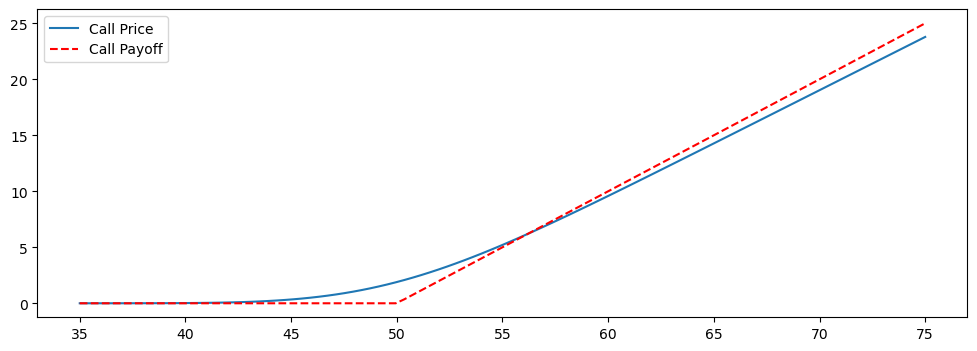

In [100]:
call = BlackScholes(x,50,0.1,0.05,0.05,1) #Instance
call.plotcall()

In [104]:
y = np.linspace(20,60,100)

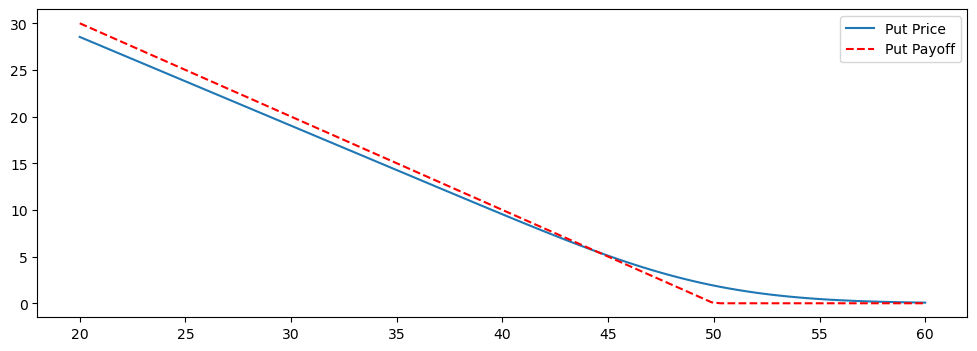

In [105]:
put = BlackScholes(y, 50,0.1,0.05,0.05,1)
put.plotput()